In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Setup dataset paths
train_dir = "Dataset/Train"
val_dir = "Dataset/Validation"
test_dir = "Dataset/Test"

dataset_path = '/content/drive/MyDrive/AAI-501-A1 Introduction to Artificial Intelligence/Project/AAI-501_ Dataset'

train_dir = dataset_path + '/' + 'Train'
val_dir = dataset_path + '/' + 'Validation'
test_dir = dataset_path + '/' + 'Test'



In [4]:
# Load dataset
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
    )

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
    )

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
    )




Found 12976 files belonging to 2 classes.
Found 4332 files belonging to 2 classes.
Found 4323 files belonging to 2 classes.


In [5]:
# Normalize the images
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# Load the ResNet50 model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Add custom layers for classification
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


In [ ]:
model_path = '/content/drive/MyDrive/AAI-501-A1 Introduction to Artificial Intelligence/Project'

# Save the model
model.save(model_path + "/" + "model_resnet50.keras")

test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy}")

In [6]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/AAI-501-A1 Introduction to Artificial Intelligence/Project'

# Load the saved model
model = load_model(model_path + "/" + "model_resnet50.keras")

In [7]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

136/136 ━━━━━━━━━━━━━━━━━━━━ 905s 7s/step - accuracy: 0.4998 - loss: 0.9232
Test Loss: 0.9178126454353333
Test Accuracy: 0.5026602149009705


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get ground truth labels and predictions
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_pred = model.predict(test_dataset)
# For binary classification
y_pred_classes = (y_pred > 0.5).astype("int32").flatten()

# Compute metrics
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

136/136 ━━━━━━━━━━━━━━━━━━━━ 869s 6s/step
Confusion Matrix:
[[ 593  646]
 [1370 1714]]

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.48      0.37      1239
           1       0.73      0.56      0.63      3084

    accuracy                           0.53      4323
   macro avg       0.51      0.52      0.50      4323
weighted avg       0.60      0.53      0.56      4323



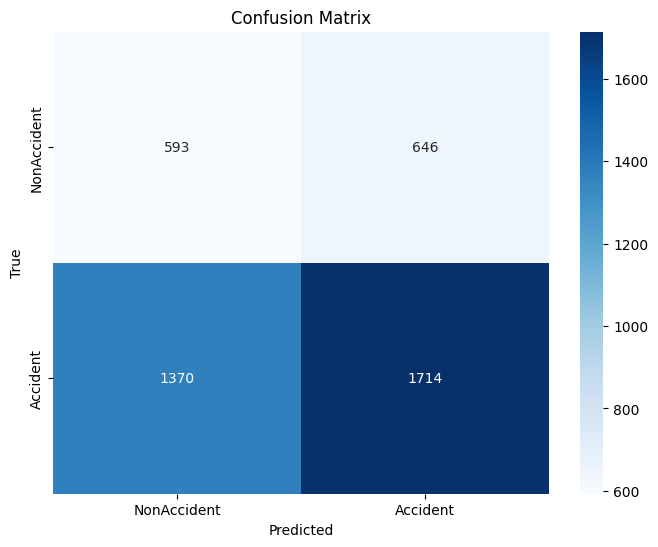

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["NonAccident", "Accident"], yticklabels=["NonAccident", "Accident"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()